# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

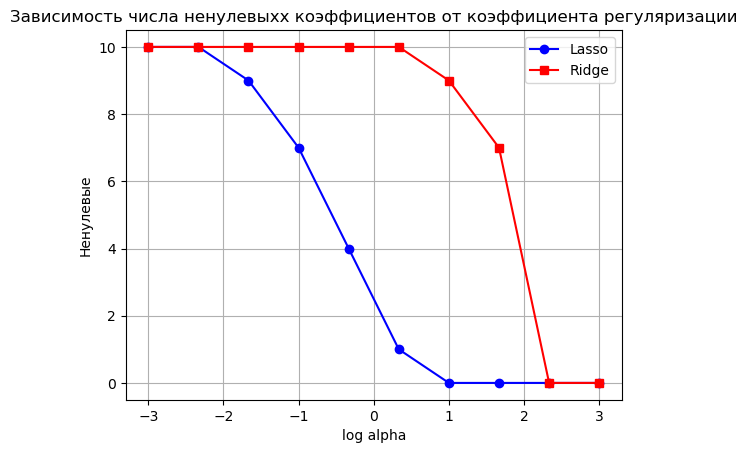

In [10]:
Lasso_mas = []
Ridge_mas = []
alpha = np.logspace(-3, 3, 10)
for i in alpha:
    L1 = Lasso(alpha = i)
    L1.fit(X_train, y_train)
    L2 = Ridge(alpha = i)
    L2.fit(X_train, y_train)
    Lasso_mas.append(np.sum([abs(L1.coef_) > 0.1]))
    Ridge_mas.append(np.sum([abs(L2.coef_) > 5]))
for i in range(len(alpha)):
    alpha[i] = math.log(alpha[i], 10)
plt.plot(alpha, Lasso_mas, marker='o', linestyle='-', color='b', label='Lasso')
plt.plot(alpha, Ridge_mas, marker='s', linestyle='-', color='r', label='Ridge')
plt.xlabel('log alpha')
plt.ylabel('Ненулевые')
plt.title('Зависимость числа ненулевыхх коэффициентов от коэффициента регуляризации')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
L = Ridge()
L.fit(X_train, y_train)
predict = L.predict(X_test)

rmse = mean_squared_error(y_test, predict, squared=False)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)
print(rmse)
print(mae)
print(r2)

58.304295113912275
49.602750809651916
0.359902022000946


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

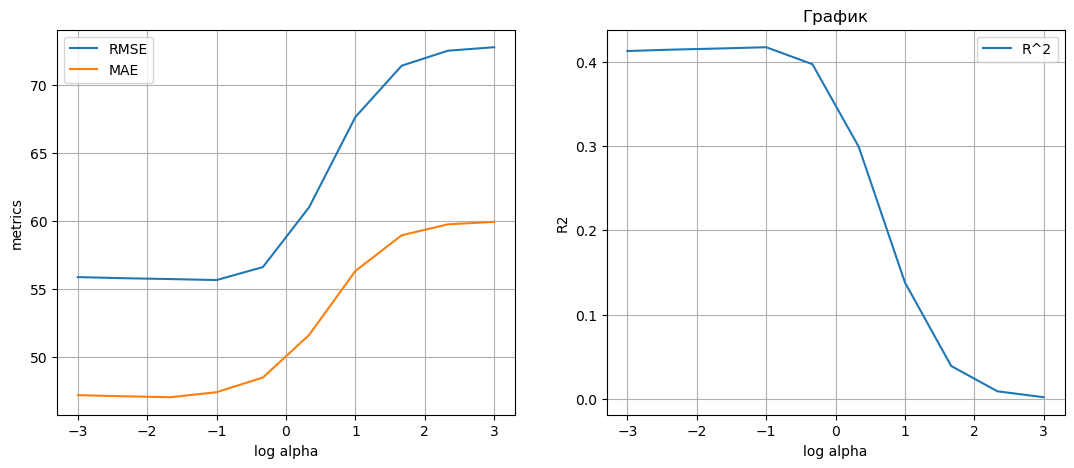

In [15]:
rmses = []
maes = []
r2s = []

alpha = np.logspace(-3, 3, 10)
for a in alpha:
    L = Ridge(alpha = a)
    L.fit(X_train, y_train)
    predict = L.predict(X_test)
    rmse = mean_squared_error(y_test, predict, squared=False)
    mae = mean_absolute_error(y_test, predict)
    r2 = r2_score(y_test, predict)
    rmses.append(rmse)
    maes.append(mae)
    r2s.append(r2)
    
    
for i in range(len(alpha)):
    alpha[i] = math.log(alpha[i], 10)
    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.plot(alpha, rmses, label='RMSE')
ax1.plot(alpha, maes, label='MAE')
ax1.set_xlabel(u"log alpha")
ax1.set_ylabel(u"metrics")
ax1.grid()
ax1.legend()

ax2.plot(alpha, r2s, label='R^2')
ax2.set_title(u"График")
ax2.set_xlabel(u"log alpha")
ax2.set_ylabel(u"R2")
ax2.grid()
ax2.legend()

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

(array([69., 28., 17.,  8.,  5.,  1.,  1.,  1.,  1.,  2.]),
 array([5.31747047e-02, 3.56228228e+03, 7.12451139e+03, 1.06867405e+04,
        1.42489696e+04, 1.78111987e+04, 2.13734278e+04, 2.49356569e+04,
        2.84978860e+04, 3.20601151e+04, 3.56223442e+04]),
 <BarContainer object of 10 artists>)

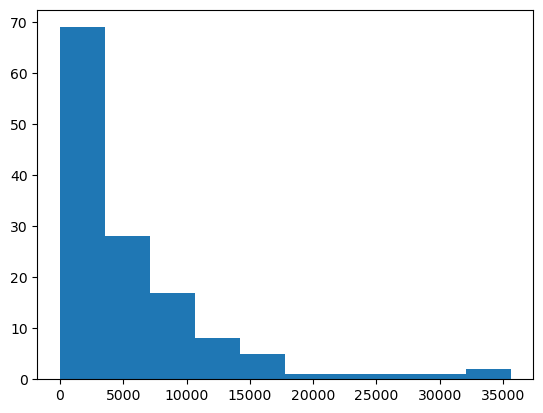

In [16]:
e = []
for i in range(len(X_test)):
    e.append(mean_squared_error([y_test[i]], [predict[i]]))
plt.hist(np.array(e))

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [18]:
L = Ridge(alpha = 0.1)
L.fit(X_train, y_train)
predict = L.predict(X_train)
i = (y_train - predict) ** 2 <= 7000
X_train_new = X_train[i]
y_train_new = y_train[i]
L = Ridge(alpha = 0.1)
L.fit(X_train_new, y_train_new)
predict = L.predict(X_test)

rmse = mean_squared_error(y_test, predict, squared=False)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)
print(rmse)
print(mae)
print(r2)

55.81211948666904
47.01986740883446
0.41345358111849595


__Задание 3.__ Отчёт

**(2 балла)**

Осуществил подсчет ошибок разными способами, боролся с выбросами, все не так просто